In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.transforms as transforms

In [19]:
plt.rcParams['figure.dpi'] = 150

In [2]:
def plot_wigner_psi_phi(psi,alpha_max = 7.5):
    fig = plt.figure(figsize=(9,9))

    widths = [6,3]
    heights = [6,3]
    spec = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                              height_ratios=heights)

    x = np.linspace(-alpha_max,alpha_max,200)
    wig = wigner(psi,x,x)
    psi_x = np.sum(wig,axis=0)
    psi_p = np.sum(wig,axis=1)


    ax = fig.add_subplot(spec[0,0])
    plot_wigner(psi,fig=fig,ax=ax,alpha_max = alpha_max)
    ax = fig.add_subplot(spec[0,1])
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(90)
    ax.plot(x,-psi_p, transform =  rot+base)
    ax.set_xticks([])
    ax.set_ylim(-alpha_max,alpha_max)
    
    ax = fig.add_subplot(spec[1,0])
    ax.plot(x,psi_x)
    ax.set_yticks([]);
    ax.set_xlim(-alpha_max,alpha_max)


# Wigner functions of the Quantum Harmonic Oscillator

In this notebook, you will explore the Wigner functions (Wigner quasiprobability distributions) of various states of  the <a href=https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator>quantum Harmonic oscillator</a>. 

As discussed in the first half of the lecture, the Wigner function is defined as:

$$
W(x,p) = \frac{1}{\pi \hbar}
\int_{-\infty}^{\infty}
\psi^*(x+y)\psi(x-y)
e^{2i p y / \hbar}
dy
$$

Here we will calculate the Wigner function of quantum states built from the eigenstates of the Harmonic oscillator.  The stationary states of the harmonic oscillator potential defined by  the eigenstates of the Hamiltonian:

$$
\hat H = \frac{1}{2} m \omega^2 \hat x^2 + \frac{1}{2m} \hat p^2
$$

They are labelled by a number $n \ge 0$, with <a href=https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Hamiltonian_and_energy_eigenstates>wavefunctions</a> $\psi_n(x)$, and are typically written as $|n\rangle$, with $n$ an integer, in <a href=https://en.wikipedia.org/wiki/Bra–ket_notation>Dirac notation</a>. 

$$
\psi_n(x) = \frac{1}{\sqrt{2^n\,n!}} \cdot \left(\frac{m\omega}{\pi \hbar}\right)^{1/4} \cdot e^{
- \frac{m\omega x^2}{2 \hbar}} \cdot H_n\left(\sqrt{\frac{m\omega}{\hbar}} x \right), \qquad n = 0,1,2,\ldots. 
$$

where $H_n(x)$ are the Hermite polynomials. 

Another name for a Harmonic oscillator eigenstate is a <a href=https://en.wikipedia.org/wiki/Fock_state>Fock state</a>: $|1\rangle$ is a $n=1$ photon Fock state, $|10\rangle$ is an $n=10$ photon Fock state. 

For this notebook, we will use the python software package <a href=http://qutip.org>QuTiP</a> (QUantum Toolbox In Python) to plot the Wigner functions of different states of the quantum harmonic oscillator. 

## The Harmonic Oscillator Ground State

Here below, we will create a "quantum state" (actually, something in QuTiP called a "quantum object") and make a plot of the Wigner function.

QuTiP works by storing numerical representations of quantum states in a discrete (countable) Hilbert space of finite size: quantum states are represented by vectors. 

In the code below, the variable `N` is used to tell QuTiP how big the Hilbert space should be. In general, picking the size of the Hilbert space is one of the trickiest things when performing numerical simulations: if you pick one that is too small, your result will be physically incorrect, while if you pick a Hilbert space that is too big, then your computation will become exponentially slower. Fortunately, QuTiP makes good use of efficient sparse matrix routines from pre-compiled libraries.

In this case, since we are working only with the ground state, we will pick `N = 1` to minimize the computation time.

Qutip contains many handy routines for making quantum states: one example is the function `fock()` that returns a Fock state. Of course, Fock states are not so hard (in a vector, they are just all zeros and one `1`), but it's handy anyway. 

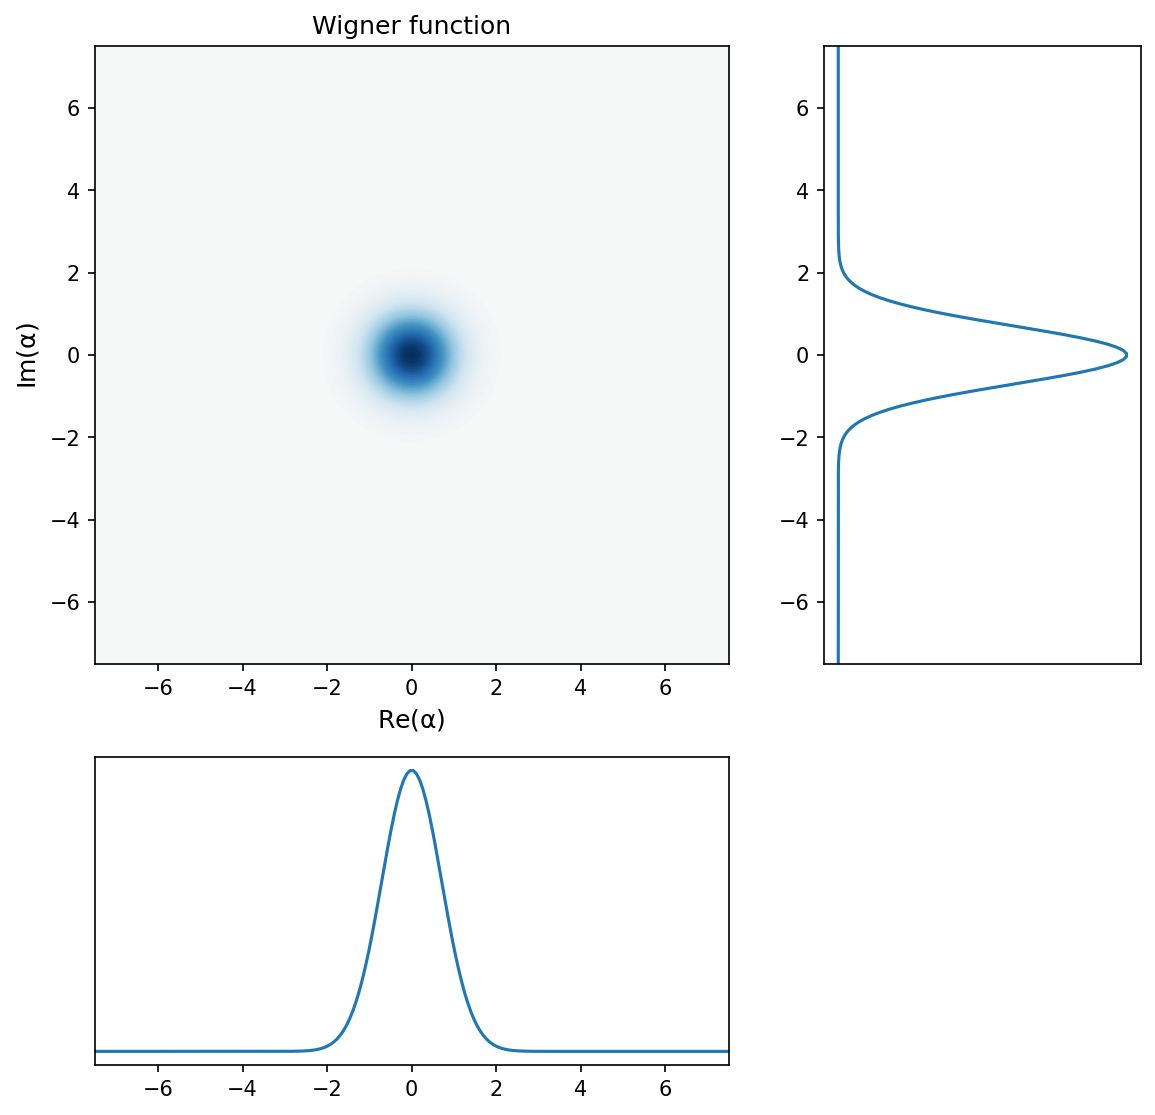

In [23]:
N = 1
psi = fock(N,0)
plot_wigner_psi_phi(psi)

## A coherent state

Qutip can also automatically create coherent states with a given $\alpha$ using the function `coherent()`, which is handy since the formula for a coherent is quite messy:

$$
|\alpha\rangle =  e^{-\frac{1}{2} |\alpha|^2} \sum_{n=0}^\infty\frac{\alpha^n}{\sqrt{n!}} |n\rangle
$$

Technically, the sum extends to infinity: to create any true coherent state (aside from $\alpha = 0$), we would need an infinite dimensional Hilbert space. However, as we know, the square of the coefficients follows a Poisson distribution, so for a small enough coherent state, one can "truncate" the Hilbert space without resulting in too much error. 

Here, we will work with $\alpha = 3$, corresponding to an average photon number of $\langle n \rangle = |\alpha|^2 = 9$. Truncating the Hilbert space at $N = 30$ gives a reasonable looking coherent state.


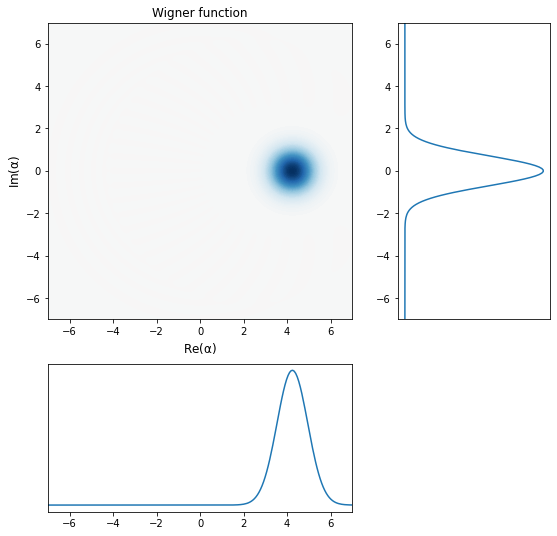

In [4]:
N = 30
psi = coherent(N,3)
plot_wigner_psi_phi(psi,alpha_max=7)

*(You may asky: why does specifying a coherent state with $\alpha = 3$ seems to produce a plot of a state with $\alpha = 4.5$? Possibly a bug in the software? Yes, sort of: it turns out that qutip scales $\alpha$ by a factor of $\sqrt{2}$ for an unknown reason when calculating Wigner functions...I've submitted a <a href=https://github.com/qutip/qutip/issues/1112>report</a> to the issue tracker system...)*

## Change phase of $\alpha$

In [5]:
N = 30
def update(phi=0):
    psi = coherent(N,3*np.exp(1j*phi))
    plot_wigner_psi_phi(psi)
    
interact(update,phi=(0,2*np.pi,2*np.pi/12));

interactive(children=(FloatSlider(value=0.0, description='phi', max=6.283185307179586, step=0.5235987755982988…

## What if I add them (cat states)?

This one is particularly interesting!

We know the Shroedinger equation is linear: the sum of two states is equal to the sum of two wavefunction.

What about the Wigner function? If I add two states, what does the Wigner function of the *sum* of the two state look like? 

Let's try it with these two:

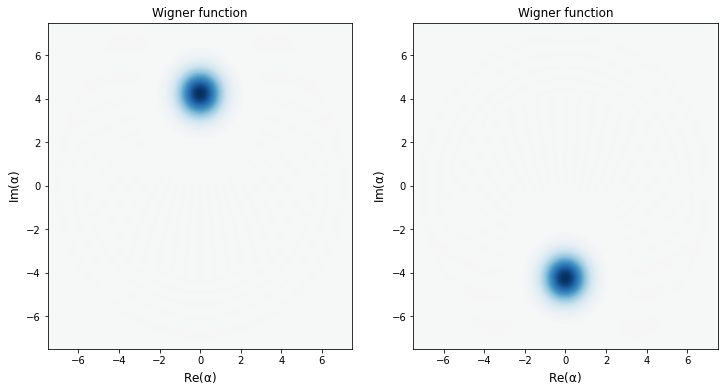

In [6]:
N = 30
fig,ax = plt.subplots(1,2,figsize=(12,6))
plot_wigner(coherent(N,3j), fig=fig, ax=ax[0])
plot_wigner(coherent(N,-3j), fig=fig, ax=ax[1]);

Add $\psi$: do the Wigner functions just add? 

*(Note convenient feature of adding quantum objects in QuTiP: it automatically normalizes them for you!)*

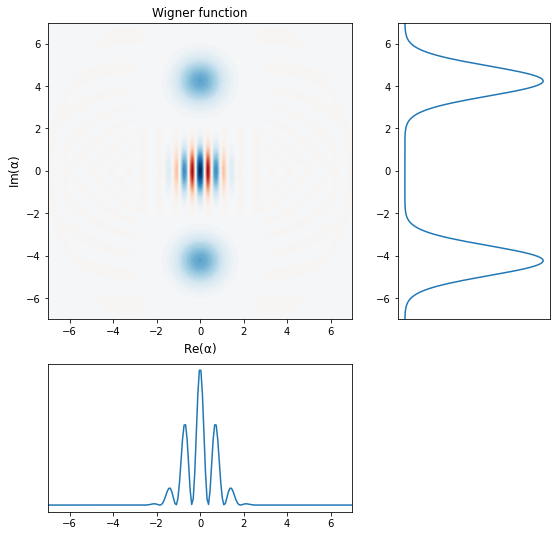

In [7]:
N = 30
psi = coherent(N,-3j) + coherent(N,3j)
plot_wigner_psi_phi(psi,alpha_max=7)

Nearly! And the difference is super-interesting, and has a particularly nice physical interpretation:

In [8]:
N = 30
def update(phi=0):
    psi = coherent(N,3*np.exp(1j*phi)) +  coherent(N,-3*np.exp(1j*phi))
    plot_wigner_psi_phi(psi)
    
interact(update,phi=(0,2*np.pi,2*np.pi/24));

interactive(children=(FloatSlider(value=0.0, description='phi', max=6.283185307179586, step=0.2617993877991494…

*(Foreshadowing to mixed states in future lectures: you can also make Wigner functions for density matrices, and the mixed state corresponding to two coherent state density matrices misses the cool stuff above, and the Wigner function is just the sum of the two Wigner functions...)*

## Simpler sum: $|0\rangle + |1\rangle$
We can also look at a simpler example: just adding $|0\rangle$ and $|1\rangle$:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}
\left(
|0\rangle + e^{i \phi}|1\rangle
\right)
$$

This is an example you have likely done yourself in a previous quantum course, and the answer is that the particle now has a non-zero $\langle x \rangle$ and / or $\langle p \rangle$, depending on the phase. 

In fact, if you look at the wavefunction $|\psi(t=0)\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, the wavefunction at a later time $t$ will be given by:

$$
|\psi(t)\rangle = 
\frac{e^{-i\omega t/2}}{\sqrt{2}} 
\left(
|0\rangle + e^{-i \omega t}|1\rangle 
\right)
$$

The relative phase $\phi$ between the two states evolves linearly in time: $\phi = -\omega t$. 

In [9]:
def update(phi=0):
    N = 2
    psi0 = fock(N,0)
    psi1 = fock(N,1)
    psi = psi0 + np.exp(1j*phi)*psi1
    plot_wigner_psi_phi(psi)
    
interact(update,phi=(0,2*np.pi,2*np.pi/12))

interactive(children=(FloatSlider(value=0.0, description='phi', max=6.283185307179586, step=0.5235987755982988…

<function __main__.update(phi=0)>

If you look at $|\Psi(x,t)|^2$, it should look familiar from what you expect!

## Other "Fock" states ( = photon number states = stationary states)

Zero photons

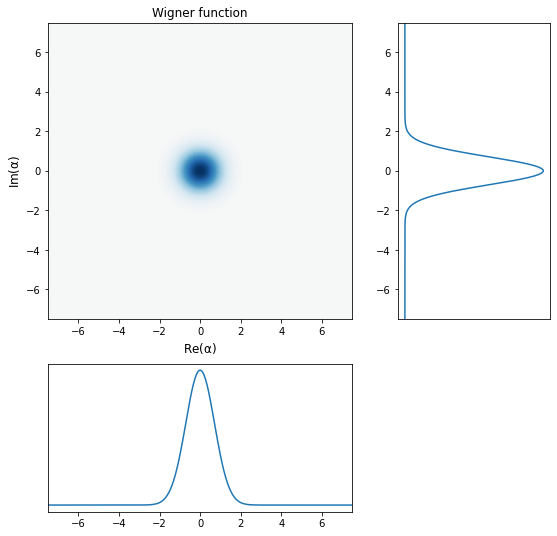

In [10]:
N = 30
psi = fock(N,0)
plot_wigner_psi_phi(psi)

One photon

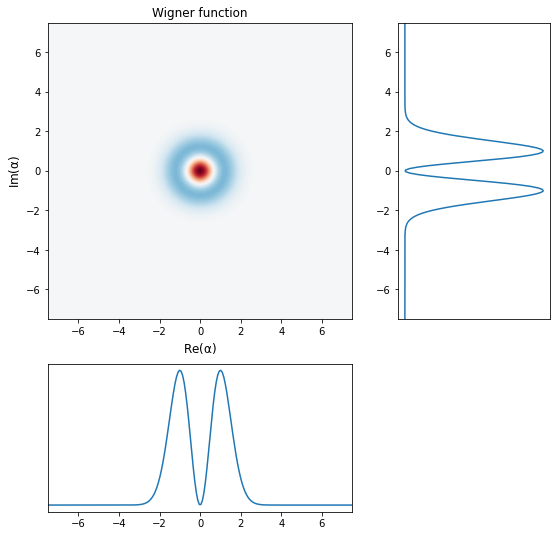

In [11]:
N = 30
psi = fock(N,1)
plot_wigner_psi_phi(psi)

Take a look at states up to $n=30$:

In [12]:
def update(n=0):
    N = 30
    psi = fock(N,n)
    plot_wigner_psi_phi(psi)
    
interact(update,n=(0,30,1))

interactive(children=(IntSlider(value=0, description='n', max=30), Output()), _dom_classes=('widget-interact',…

<function __main__.update(n=0)>

## "Photon shot noise"

If we go back to the coherent states above, what is particularly strange is that the quantum noise of the coherent state in the Wigner plot is always the same: it is always a Heisenberg-limited ball, independent of it's amplitude. 

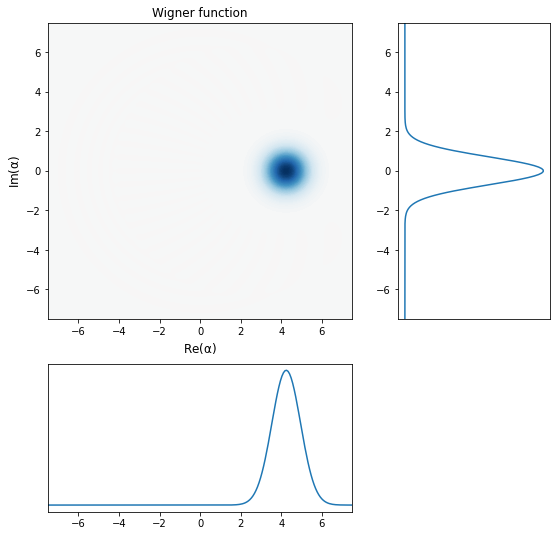

In [13]:
N = 30
psi = coherent(N,3)
plot_wigner_psi_phi(psi)

But wait a minute: didn't we learn that coherent states have "shot noise" that increases in amplitude when $\alpha$ get larger. Why don't I see any of this increasing noise in the Wigner plot above? 

The answer is that the "shot noise" is not the "quantum fluctuation" noise we see above. The quantum fluctuations of the momentum and position (the "quadratures") of the coherent state is indeed independent of its amplitude, and in fact always Heisenberg limited. 

The important difference is that if we measure "photon number", then we project onto a Fock state. And, as we know, we need a Poissionian distribution of Fock states to construct a coherent state. 

In [22]:
def update(n=29):
    N = 30
    psi = coherent(N,3)
    
    psi.get_data()[n:] = 0
    psi.unit()
    
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    plot_fock_distribution(psi,fig=fig,ax=ax[0],unit_y_range=False)
    plot_wigner(psi,fig=fig,ax=ax[1])

interact(update,n=(1,29))

interactive(children=(IntSlider(value=29, description='n', max=29, min=1), Output()), _dom_classes=('widget-in…

<function __main__.update(n=29)>

## Squeezed states

In the end, if you are interested in sensing a quadrature of an oscillator (for example, if you are working for <a href=https://en.wikipedia.org/wiki/LIGO>LIGO</a> trying to detect gravitational waves), you might want to be able to detect signals that are smaller than $x_{zpf}$ in position. 

At first, it might seem that this is impossible: quantum mechanics doesn't allow it! The ground state and coherent state are Heisenberg limited! 

And you would be correct if you restricted yourself to the ground state or a coherent state. (And don't even bother with any of the higher Fock states, the have only bigger $\sigma_x$ and are not even Heisenberg limited!)

Is everything hopeless? 

It turns out not: Heisenberg only limits the product $\sigma_x \sigma_p > \hbar / 2$. I can actually get lower uncertainty in my position measurement as long as I don't mind sacrificing some uncertainty in my momentum: in this case, the "spherical quantum fluctuation ball" of my coherent state gets "squeezed" in the vertical direction, becoming a cigar shape. These will actually be implemented in the next generation of LIGO to enhance the sensitivity of the interferometer for detecting gravitational waves! 

You can find lots of information about squeezed states on <a href=https://en.wikipedia.org/wiki/Squeezed_coherent_state>wikipedia</a>, and you can also easily generate them in QuTiP using the `squeeze` operator, which squeezes a state along a particular quadrature direction. Squeezed light has many applications, including the sensing one mentioned above, but also for reducing noise in photon counting experiments, and also in <a href=https://en.wikipedia.org/wiki/Squeezed_states_of_light#Entanglement-based_quantum_key_distribution>quantum communication</a>. 

Squeezing is so importanat it even has two wikipedia pages :)

https://en.wikipedia.org/wiki/Squeezed_coherent_state

https://en.wikipedia.org/wiki/Squeezed_states_of_light

In the code below, We will first create a coherent state in a slightly different way by "displacing" the ground state:

In [ ]:
N = 30
psi = displace(N,3) * basis(N, 0) 
plot_wigner_psi_phi(psi)

And we can also add a "squeezing" operation to produce a squeezed state:

In [ ]:
N = 50
psi =  displace(N,3) *  squeeze(N, 1) * fock(N,0)
plot_wigner_psi_phi(psi)

In [ ]:
N = 50
a = destroy(N)
x = a+a.dag()
p = -1j*(a-a.dag())
psi_coh =  fock(N,0)
psi_sq = squeeze(N, 1) * fock(N,0)
print(expect(x**2,psi_coh)-expect(x,psi_coh)**2)
print(expect(p**2,psi_coh)-expect(p,psi_coh)**2)
print(expect(x**2,psi_sq)-expect(x,psi_sq)**2)
print(expect(p**2,psi_sq)-expect(p,psi_sq)**2)
print((expect(x**2,psi_sq)-expect(x,psi_sq)**2)*(expect(p**2,psi_sq)-expect(p,psi_sq)**2))

The second parameter in the function is the <a href=https://en.wikipedia.org/wiki/Squeezed_coherent_state#Operator_representation>squeezing parameter</a>: the larger it is, the more squeezed the state becomes. You can play with it to see how it works. 

(Be careful: for high squeezing you may need a bigger Hilbert space...)